In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Получите данные и загрузите их в рабочую среду

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df[data.target_names[0]] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Проведите первичный анализ.
- a. Проверьте данные на пропуски. Удалите в случае обнаружения.
- b. *Нормализуйте один из признаков

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
0 in df.values

False

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Population']])
df['Population'] = scaler.transform(df[['Population']])

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,0.039869,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,0.031740,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,0.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,0.021974,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,0.032596,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,0.048264,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,1.000000,1243.333333,41.950000,-114.310000,5.000010


### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Обучите модель регрессии на обучающем множестве

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [9]:
lr_model.score(X_test, y_test)

0.5757877060324512

### 6. Обучите дерево решений на обучающем множестве
- a. Повторите п. 5 для полученной модели.
- b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_model.score(X_test, y_test)

0.622075845135081

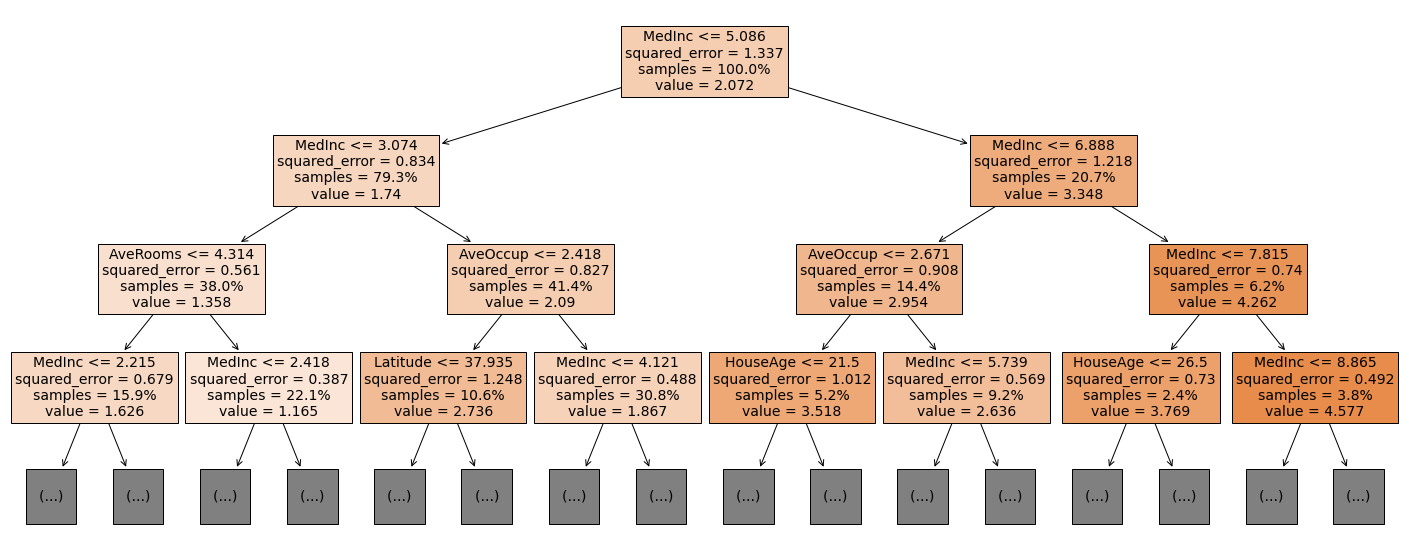

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(dt_model, max_depth=3, feature_names=X_train.columns, filled=True, proportion=True, fontsize=14)
plt.show()

### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор
- a. Повторите п. 5 для полученной модели.

In [12]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model, n_jobs=-1, cv=5,
                    param_grid={'max_depth': range(1,15), 'min_samples_leaf': range(1,30)})
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'max_depth': 12, 'min_samples_leaf': 16}, 0.7306340616889586)

In [13]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=grid.best_params_['max_depth'],
                                 min_samples_leaf=grid.best_params_['min_samples_leaf'])
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.7257496963711765

### 8. Сформулируйте выводы по проделанной работе
- a. Сравните точность двух моделей.

Для базовой модели линейной регрессии коэффициент детерминации R2 на тестовой выборке получился `0.576`, что указывает на весьма слабую модель регрессии. Переход на базовую модель решающего дерева дал прирост R2 на 8% до `0.622`. Подбор оптимальных параметров глубины дерева и минимального количества объектов в листе дал еще более существенный прирост R2 почти на 17% до `0.726`.

При этом ранее для этого же датасета работа с переменными (удаление выбросов, преобразование признаков) не привела к настолько же существенному росту метрики качества. R2 на тестовой выборке тогда удалось получить лишь на уровне `0.609`.

- b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Хотя бытует мнение о том, что деревья решений не очень хорошо подходят для задач регрессии, это ДЗ продемонстрировало, что переход с модели линейной регрессии на модель решающего дерева может моментально дать заметный прирост метрики качества. Думаю здесь дело не в принципиальном превосходстве одного метода над другим, а в специфике самих данных. В предыдущем ДЗ в ходе работы над этим же датасетом стало понятно, что у целевой переменной в целом слабая линейная зависимость от признаков, что делает работу линейного регрессора затруднительной без соответствующей обработки входных данных.

В то же время регрессор на основе дерева решений может лучше настроиться под такие данные, поскольку будет их расщеплять и описывать все более и более мелкие наборы объектов. Без специальной настройки критериев останова такой подход ведет к переобучению модели на тренировочных данных и снижению обобщающей способности. При этом будет наблюдаться рост метрики качества на обучении. Но для новых данных со значениями не представленными ранее в обучающей выборке, выработанный моделью алгоритм может быть уж просто неприменим. В таком случае очевидным преимуществом уже будет обладать модель линейной регрессии.